## Linear regression

In [1]:
import sklearn
sklearn.__version__

'0.22.1'

### <a name='a1'></a> Regresja Liniowa - wprowadzenie

Zdefiniujmy:
- $X_1, X_2, ..., X_n$ - zmienne niezależne (nasze dane do modelu)
- $Y$ - zmienna docelowa
- $y_{true}$ - wartość rzeczywista
- $y_{pred}$ - wartość przewidziana przez model
- $w_0, w_1,...,w_n$ - wagi do modelu (podlegaja uczeniu)

W tym modelu zakłada się. ze wartość przewidywana $y_{pred}$ może być liniową kombinacją zmiennych niezależnych. Ogólna postac modelu:

>  $$y_{pred}(W, X) = w_0 + w_1X_1 + ... + w_nX_n$$
>  $$Y = XW$$

gdzie:
>  $X = \begin{pmatrix} 1 & X_1 & X_2 & \dots & X_n\end{pmatrix}$,  $W = \begin{pmatrix} w_{0} \\  w_{1}  \\ \dots \\ w_{n}\end{pmatrix}$

Wprowadźmy oznaczenia:
- $w = (w_1,...w_n)$ jako `coef_`
- $w_0$ jako `intercept_`

Regresja Liniowa polega na takim dopasowaniu wag $w_0, w_1,...,w_n$ by zminimalizować funkcję kosztu(cost function):
>$$||XW-Y||_{2}^{2} \rightarrow min$$  

Przykład w $R^2$:  
$Y=w_0 + w_1X_1$

Przykład w $R^3$:  
$Y=w_0 + w_1X_1 + w_2X_2$

### Podstawowe założenia regresji liniowej

* mamy zależność liniową
* wariancja reszt jest taka sama dla wszystkich obserwacji
* brak współliniowości (żaden z predyktorów nie stanowi kombinacji liniowej innych predyktorów)

### Podstawowe założenia regresji liniowej

* mamy zależność liniową
* wariancja reszt jest taka sama dla wszystkich obserwacji
* brak współliniowości (żaden z predyktorów nie stanowi kombinacji liniowej innych predyktorów)

In [5]:
import numpy as np

X = np.arange(0, 50, 0.5)
noise = 10 * np.random.randn(100)
y = 2 * X + 100 + noise
X = X.reshape(-1,1)

print('Rozmiar X: ',X.shape)
print('Rozmiar Y: ',y.shape)

Rozmiar X:  (100, 1)
Rozmiar Y:  (100,)


### <a name='a3'></a> Podział danych na zbiór treningowy i testowy

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

print('X_train shape:', X_train.shape)
print('X_test shape:',  X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:',  y_test.shape)

X_train shape: (75, 1)
X_test shape: (25, 1)
y_train shape: (75,)
y_test shape: (25,)


### <a name='a4'></a> Wizualizacja

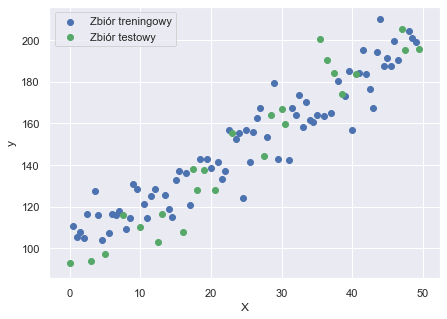

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(7,5))
plt.scatter(X_train, y_train, c='b', label='Zbiór treningowy')
plt.scatter(X_test, y_test, c='g', label='Zbiór testowy')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()


### <a name='a5'></a> Regresja liniowa

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(lin_reg.coef_)
print(lin_reg.intercept_)

[1.91309193]
102.60767595881134


Rozwiązaniem jest prosta o postaci:
$Y=102.61 + 1.91\cdot X_1$   
### <a name='a6'></a>  Wizualizacja zbioru treningowego i dopasowanego modelu

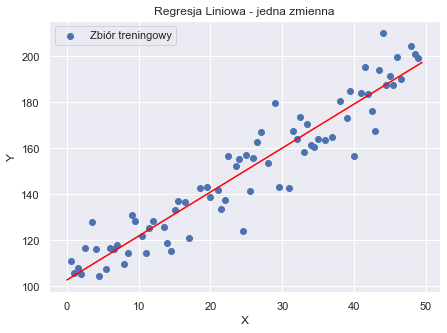

In [10]:
plt.figure(figsize=(7,5))
plt.title('Regresja Liniowa - jedna zmienna')
plt.scatter(X_train, y_train, c='b', label='Zbiór treningowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

### <a name='a7'></a>  Wizualizacja zbioru testowego i dopasowanego modelu

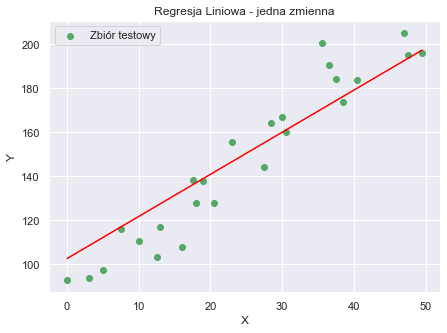

In [11]:
plt.figure(figsize=(7,5))
plt.title('Regresja Liniowa - jedna zmienna')
plt.scatter(X_test, y_test, c='g', label='Zbiór testowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

### <a name='a8'></a> Ocena modelu
Metoda `score()` zwraca współczynnik determinacji $R^2$  naszej predykcji.

Współczynnik determinacji jest zdefiniowany jako:

### $R^{2} =1 - \frac{\sum_{t=1}^{n}(y_{pred, t} - \bar{y}_{true} )^2}{\sum_{t=1}^{n}(y_{true, t} - \bar{y}_{true} )^2}$

Współczynnik determinacji jest miarą stopnia dopasowania modelu do próby. Dopasowanie modelu jest tym lepsze im wartość $R^2$ jest bliżej 1.

In [12]:
lin_reg.score(X_test,y_test)

0.8779300020342988

In [13]:
lin_reg.score?

### <a name='a9'></a> Przykład złego zastosowania regresji liniowej

Text(0, 0.5, 'y')

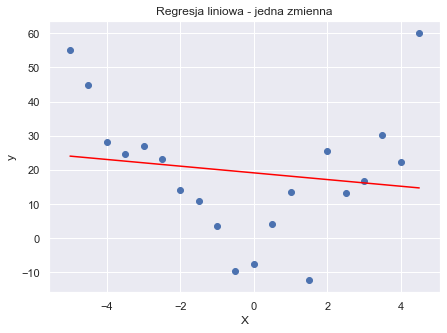

In [15]:
X = np.arange(-5, 5, 0.5)
noise = 10 * np.random.randn(20)
y = 2 * (X**2) + 4 + noise
X= X.reshape(-1,1)

lin_reg = LinearRegression()
lin_reg.fit(X,y)

plt.figure(figsize=(7,5))
plt.title('Regresja liniowa - jedna zmienna')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')